# IMPORTING REQUIRED LIBRARIES

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection

from sklearn.feature_selection import RFE

# import function to perform linear regression

from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# ''' REGULARIZATION '''

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

# Reading the data

In [3]:

df = pd.read_csv('listings.csv')

In [4]:
df.head(1)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20211200000000.000000,05-12-2021,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,09-09-2008,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a day,80%,17%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,8.000000,8.000000,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.753560,-73.985590,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.000000,"[""Extra pillows and blankets"", ""Baking sheet"",...",$150.00,30,1125,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,NaN,t,3,33,63,338,05-12-2021,48,0,0,21-11-2009,04-11-2019,4.700000,4.720000,4.620000,4.760000,4.790000,4.860000,4.410000,NaN,f,3,3,0,0,0.330000


In [5]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [6]:
# dimensions of data
df.shape

(38277, 74)

In [7]:
# checking datatypes of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38277 entries, 0 to 38276
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            38277 non-null  int64  
 1   listing_url                                   38277 non-null  object 
 2   scrape_id                                     38277 non-null  float64
 3   last_scraped                                  38277 non-null  object 
 4   name                                          38264 non-null  object 
 5   description                                   37085 non-null  object 
 6   neighborhood_overview                         22650 non-null  object 
 7   picture_url                                   38277 non-null  object 
 8   host_id                                       38277 non-null  int64  
 9   host_url                                      38277 non-null 

In [8]:
# price , host_responserate , host_acceptance have different data types we need to change them to required types
# After cleaning the anamolies 

In [9]:
df.describe(include = np.number)

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,38277.000000,38277.000000,38277.000000,38243.000000,38243.000000,38277.000000,38277.000000,38277.000000,0.000000,34302.000000,35872.000000,38277.000000,38277.000000,38259.000000,38259.000000,38259.000000,38259.000000,38259.000000,38259.000000,0.000000,38277.000000,38277.000000,38277.000000,38277.000000,38277.000000,38277.000000,38277.000000,28773.000000,28161.000000,28172.000000,28154.000000,28165.000000,28151.000000,28150.000000,38277.000000,38277.000000,38277.000000,38277.000000,28773.000000
mean,29622391.364945,20211200000000.000000,114830455.233874,49.020056,49.020056,40.729206,-73.948967,2.792094,NaN,1.323567,1.593527,21.623769,57796.642553,21.835620,27.618939,1461230.932225,3538051.803262,27.205186,2247183.247801,NaN,6.905531,19.787523,33.946391,134.290984,23.302871,5.032160,0.539802,4.585140,4.743904,4.612408,4.813884,4.807454,4.750307,4.646892,17.747655,8.042637,9.593934,0.047966,1.721019
std,17422394.081480,0.000000,129919366.832031,312.947661,312.947661,0.055752,0.050759,1.869736,NaN,0.708327,1.078893,29.573333,10977368.411933,34.363195,69.948235,55964015.090109,87072570.881856,68.146270,65159632.813771,NaN,10.017318,22.038048,34.836649,143.196175,50.415484,14.693768,1.489229,0.835918,0.496406,0.575452,0.439260,0.465544,0.416101,0.518905,59.150451,34.977178,43.310123,0.426789,4.399826
min,2595.000000,20211200000000.000000,2438.000000,0.000000,0.000000,40.504560,-74.249840,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,13410478.000000,20211200000000.000000,11394622.000000,1.000000,1.000000,40.689260,-73.983270,2.000000,NaN,1.000000,1.000000,3.000000,60.000000,3.000000,3.000000,360.000000,365.000000,3.000000,365.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.570000,4.700000,4.500000,4.800000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.120000
50%,30812691.000000,20211200000000.000000,50052968.000000,1.000000,1.000000,40.725180,-73.954770,2.000000,NaN,1.000000,1.000000,30.000000,1125.000000,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,NaN,1.000000,8.000000,25.000000,73.000000,4.000000,0.000000,0.000000,4.820000,4.900000,4.800000,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.480000
75%,46428551.000000,20211200000000.000000,200239515.000000,3.000000,3.000000,40.762680,-73.930430,4.000000,NaN,1.000000,2.000000,30.000000,1125.000000,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,NaN,11.000000,38.000000,67.000000,302.000000,20.000000,3.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.780000
max,53665099.000000,20211200000000.000000,434408046.000000,3750.000000,3750.000000,40.914020,-73.710870,16.000000,NaN,16.000000,24.000000,1250.000000,2147483647.000000,1250.000000,1250.000000,2147483647.000000,2147483647.000000,1250.000000,2147483647.000000,NaN,30.000000,60.000000,90.000000,365.000000,1009.000000,669.000000,67.000000,5.000000,5.000000,5.

In [10]:
df.describe(include = np.object)

,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
count,38277,38277,38264,37085,22650,38277,38277,38243,38243,38140,22128,21084,21084,21791,38243,38243,38243,30813,38277,38243,38243,22651,38277,38277,38277,38277,38170,38277,38277,38277,38277,28773,28773,1,38277
unique,38277,2,36869,34133,18614,37148,25904,9123,4289,1747,14424,4,88,101,2,25686,25686,484,526,2,2,207,222,5,78,4,30,31740,949,2,2,3171,2560,1,2
top,https://www.airbnb.com/rooms/2595,05-12-2021,Water View King Bed Hotel Room,Welcome to UNTITLED (Adj.) at 3 Freeman Alley!...,Walk out of the Cassa and you’ll immediately ...,https://a0.muscache.com/pictures/6998e77e-4564...,https://www.airbnb.com/users/show/305240193,June,29-10-2019,"New York, New York, United States",If you're searching for a place of your own or...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/4adc1...,https://a0.muscache.com/im/pictures/user/4adc1...,Bedford-Stuyvesant,"['email', 'phone']",t,t,"New York, United States",Bedford-Stuyvesant,Manhattan,Entire rental unit,Entire home/apt,1 bath,"[""Long term stays allowed""]",$150.00,t,05-12-2021,01-01-2020,28-11-2021,41662/AL,f
freq,1,31879,30,61,84,36,421,431,433,21102,421,11151,13299,5342,30865,421,421,2138,4357,37994,31866,9301,2821,16781,16014,20397,19697,142,1307,36159,31879,119,789,1,27851


# Cleaning the anamolies 

In [11]:
df['price'] = df['price'].str.replace('$', '')

In [12]:
df['price'] = df['price'].str.replace(',' , '')

In [13]:
df['price'] =df['price'].astype(float)

In [14]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%' , '')
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%' , '')

In [15]:
df['host_response_rate'] =df['host_response_rate'].astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].astype(float)

# Drop unnecessry columns 

In [16]:
df.drop(['id','listing_url','scrape_id' , 'last_scraped' , 'name','description','picture_url','host_id',\
         'host_url','host_name','host_location','host_about','host_response_time','host_thumbnail_url','host_picture_url',\
        'host_neighbourhood','host_listings_count','host_verifications','host_has_profile_pic'],axis=1,inplace=True)

In [17]:
df.drop(['neighbourhood','neighbourhood_cleansed','latitude','longitude','property_type','amenities',\
         'has_availability','calendar_last_scraped' , 'number_of_reviews_l30d' , 'first_review' , 'last_review' ],axis =1 , inplace = True)

In [18]:
df.drop(['neighborhood_overview' , 'host_since'] ,axis =1 , inplace = True)

In [19]:
#df['host_listings_count'].sum() # drop since both the columns are same 

In [20]:
#df['host_total_listings_count'].sum()

In [21]:
#df['longitude'].std() #instead of the latitude and longitude we going with neighbourhood group cleansed for the location

In [22]:
# neighbourhood_overiview  , 'neighbourhood' , 'neighbourhood_cleansed' == 'neighbourhood_group_cleansed'

In [23]:
# host_listings count and host_total_listings_count giving same information 

# Missing values

In [24]:
def missing(data):
    total = data.isnull().sum()
    percentage = total /len(data) *100
    missing_percentage = pd.concat([total  , percentage] , axis = 1 , keys = ['Total' , 'Percentage'])
    return missing_percentage

In [25]:
missing_data =missing(df).sort_values(by = 'Percentage' , ascending = False)

In [26]:
missing_data[missing_data['Percentage'] > 70.00]

,Total,Percentage
calendar_updated,38277,100.000000
bathrooms,38277,100.000000
license,38276,99.997387


In [27]:
df.drop(['bathrooms' , 'calendar_updated' , 'license'] , axis = 1, inplace = True)

In [28]:
df.shape

(38277, 39)

In [29]:
missing(df)

,Total,Percentage
host_response_rate,17193,44.917313
host_acceptance_rate,16486,43.070251
host_is_superhost,34,0.088826
host_total_listings_count,34,0.088826
host_identity_verified,34,0.088826
neighbourhood_group_cleansed,0,0.000000
room_type,0,0.000000
accommodates,0,0.000000
bathrooms_text,107,0.279541
bedrooms,3975,10.384826


# Missing value Treatment

In [30]:
df_feature = df.drop('price' ,axis =1)

In [31]:
df_feature.shape

(38277, 38)

In [32]:
df_target = df[['price']]

In [33]:
df_num = df_feature.select_dtypes(include = np.number)
df_num.shape

(38277, 32)

In [34]:
df_cat = df_feature.select_dtypes(include = np.object)
df_cat.shape

(38277, 6)

# Treatment for categorical variables

In [35]:
df_cat['host_is_superhost'].value_counts()

f    30865
t     7378
Name: host_is_superhost, dtype: int64

In [36]:
df_cat['host_is_superhost'].mode()

0    f
dtype: object

In [37]:
for i in df_cat.columns :
    df_cat[i] = df_cat[i].fillna(df_cat[i].mode()[0])

In [38]:
missing(df_cat)

,Total,Percentage
host_is_superhost,0,0.000000
host_identity_verified,0,0.000000
neighbourhood_group_cleansed,0,0.000000
room_type,0,0.000000
bathrooms_text,0,0.000000
instant_bookable,0,0.000000


# Treatment for numerical variables 

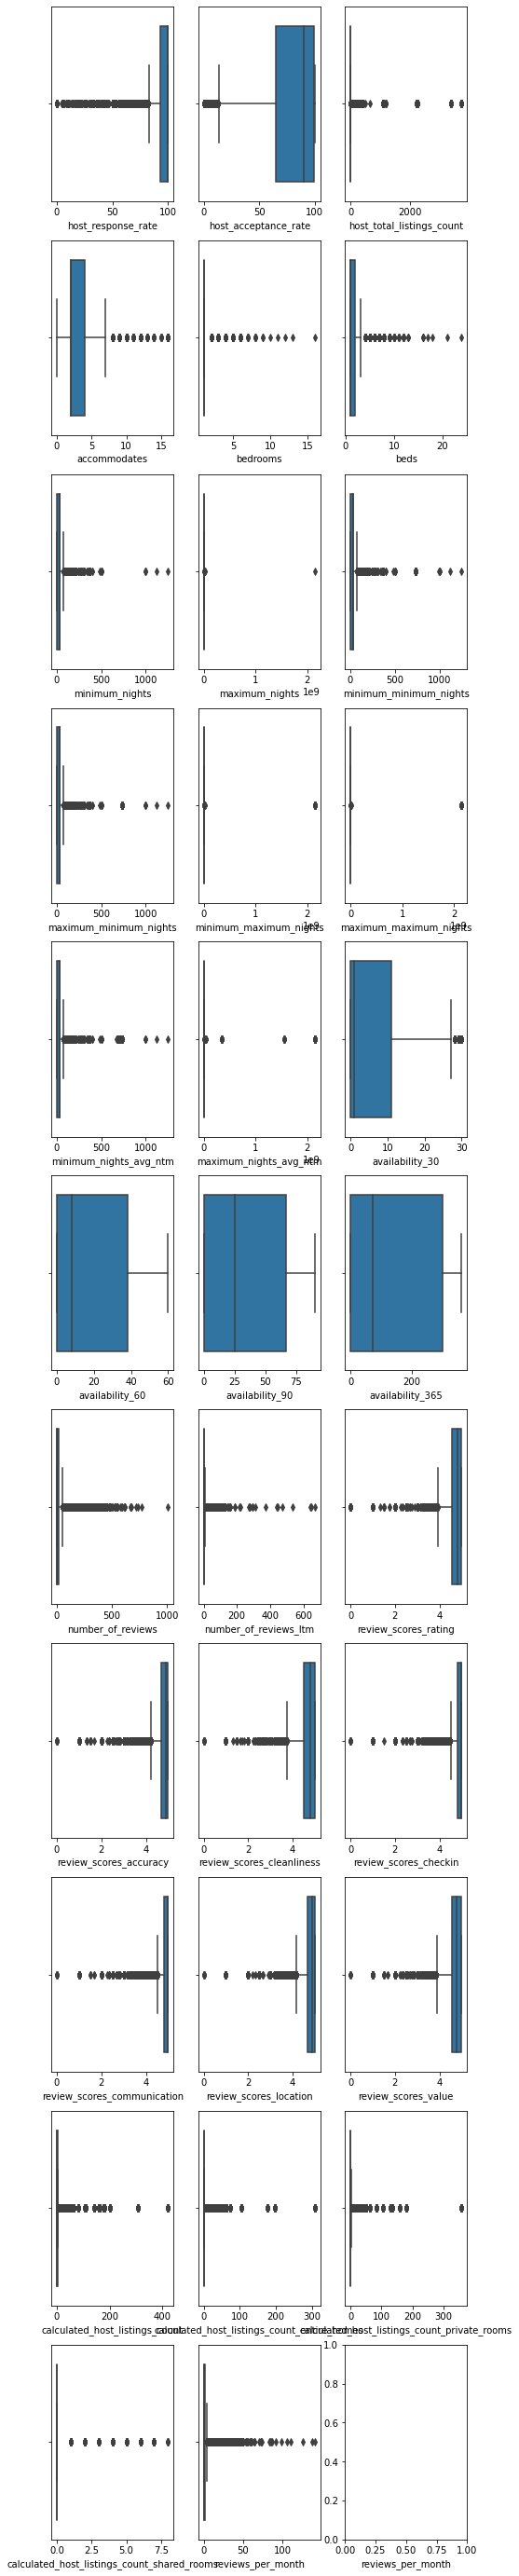

<Figure size 432x288 with 0 Axes>

In [39]:
fig , ax = plt.subplots(11,3,figsize = (8 , 50))
for i , subplot in zip(df_num.columns, ax.flatten()):
    sns.boxplot( df_num[i], ax = subplot)
plt.xlabel(i)

plt.show()
plt.tight_layout()

In [40]:
# Treatment based upon the outliers ,since ouliers presence causes huge impact here we are treating them with median 
# and the rest of variabels with  mean ()

In [41]:
for i in df_num.drop('host_response_rate' , axis = 1).columns:
    df_num[i] = df_num[i].fillna(df_num[i].median())  

In [42]:
df_num['host_response_rate'].fillna(df_num['host_response_rate'].mean() , inplace =  True)

In [43]:
missing(df_num)

,Total,Percentage
host_response_rate,0,0.000000
host_acceptance_rate,0,0.000000
host_total_listings_count,0,0.000000
accommodates,0,0.000000
bedrooms,0,0.000000
beds,0,0.000000
minimum_nights,0,0.000000
maximum_nights,0,0.000000
minimum_minimum_nights,0,0.000000
maximum_minimum_nights,0,0.000000


# Outlier detection

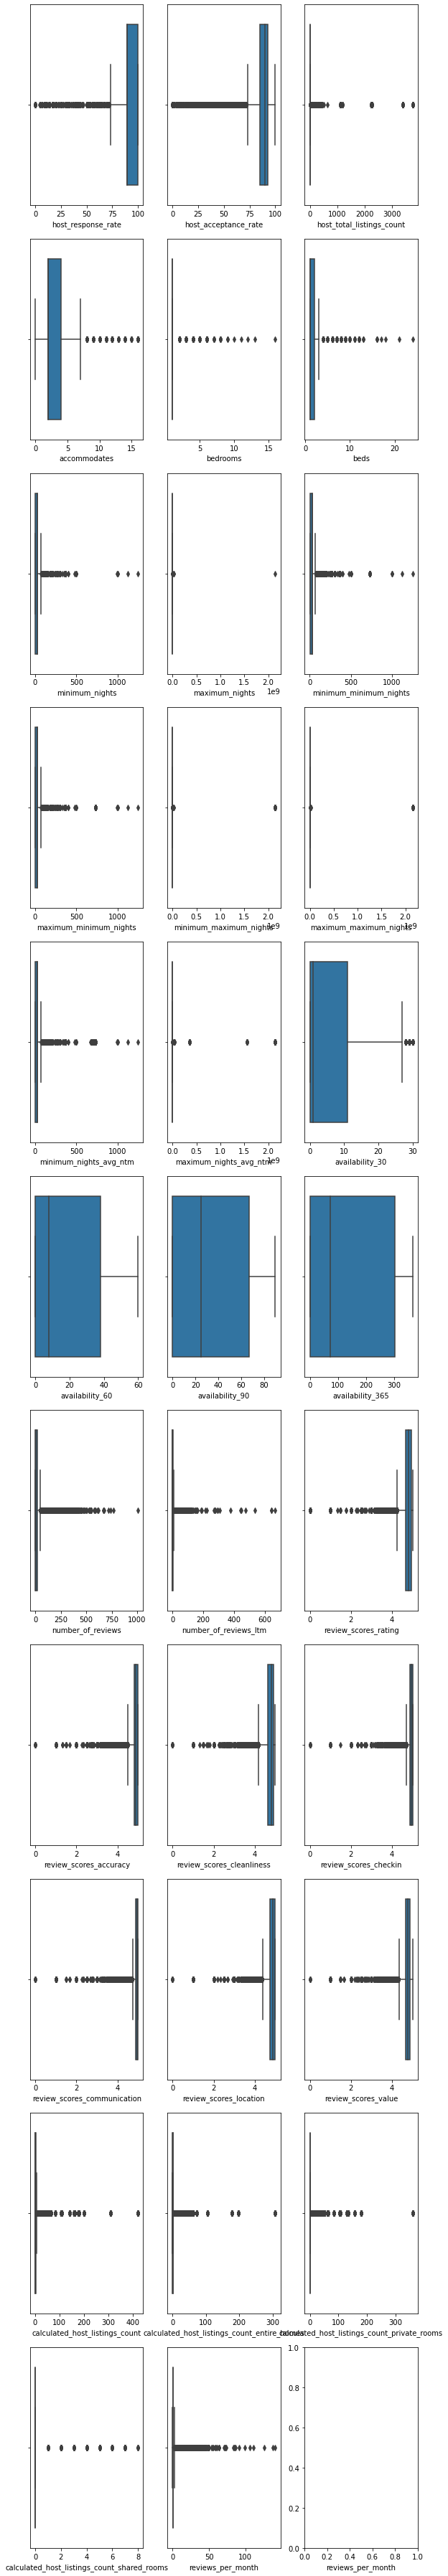

<Figure size 432x288 with 0 Axes>

In [44]:

fig , ax = plt.subplots(11 , 3,figsize = (8 , 50))
for i , subplot in zip(df_num.columns , ax.flatten()):
    sns.boxplot(df_num[i] , ax = subplot)
    plt.xlabel(i)
    plt.tight_layout()

plt.show()
plt.tight_layout()


<AxesSubplot:xlabel='host_response_rate'>

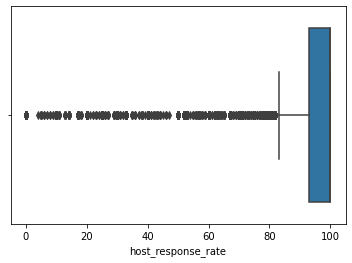

In [45]:
sns.boxplot(df['host_response_rate'])

In [46]:
df['host_response_rate'].describe()

count   21084.000000
mean       89.073136
std        25.110837
min         0.000000
25%        93.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: host_response_rate, dtype: float64

# Outlier Treatment

In [47]:
for i in df_num.columns:
    Q1 = df_num[i].quantile(0.25)
    Q3 = df_num[i].quantile(0.75)
    IQR = Q3 -Q1
    UL = Q3 +(1.5 * IQR)
    LL = Q1 - (1.5* IQR)
    for e,j in enumerate(df_num[i]):
        if j>UL:
            df_num[i][e]=UL
        elif j<LL:
            df_num[i][e]=LL

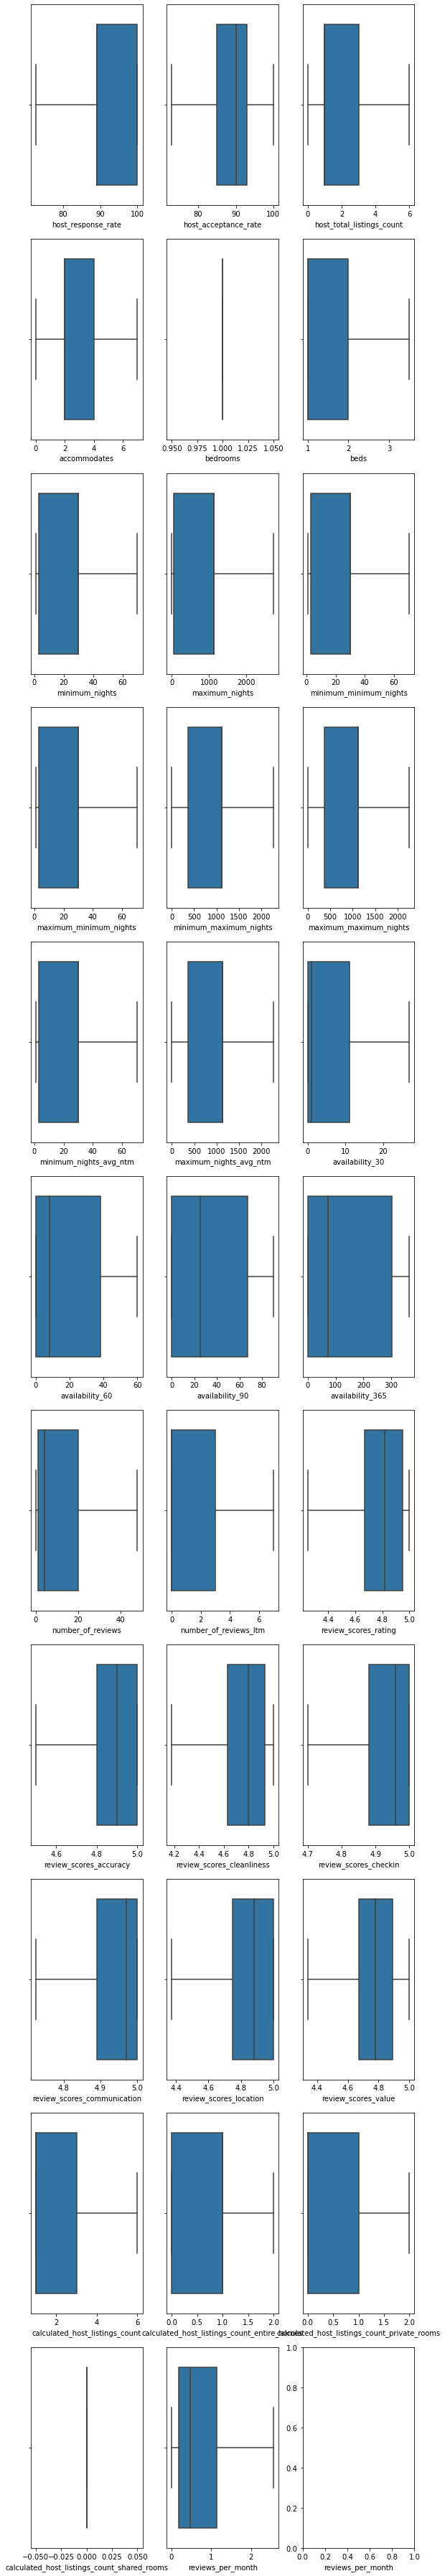

<Figure size 432x288 with 0 Axes>

In [48]:
fig , ax = plt.subplots(11,3,figsize = (8 , 50))
for i , subplot in zip(df_num.columns , ax.flatten()):
    sns.boxplot(df_num[i] , ax = subplot)
    plt.xlabel(i)
    plt.tight_layout()

plt.show()
plt.tight_layout()


<AxesSubplot:xlabel='price'>

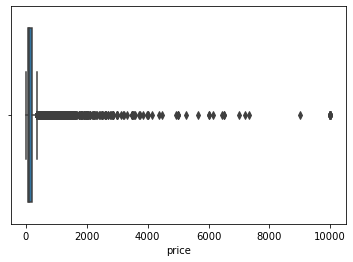

In [49]:
sns.boxplot(df_target['price'])

In [50]:
# We are leaving price(target variable and treating rest of them)

# Encoding

In [51]:
df_cat['room_type'].value_counts()

Entire home/apt    20397
Private room       17098
Shared room          572
Hotel room           210
Name: room_type, dtype: int64

In [52]:
df_cat['room_type']= df_cat['room_type'].replace('Entire home/apt' , 'Entire home')

In [53]:
df.groupby('bathrooms_text').mean()['price'].sort_values(ascending = False)

bathrooms_text
4.5 shared baths    1950.000000
7 baths             1950.000000
8 baths             1461.333333
5 baths             1406.909091
6 baths             1359.200000
5.5 baths           1347.000000
4.5 baths           1216.761905
6.5 baths            900.000000
3.5 baths            882.721519
4 baths              810.034483
3 baths              689.378378
7.5 baths            579.500000
2.5 baths            488.221498
2 baths              351.451159
4 shared baths       290.090909
Half-bath            243.875000
1.5 baths            226.389798
0 baths              220.418605
1 private bath       203.358593
1 bath               176.384982
6 shared baths       139.500000
0 shared baths        98.169014
Shared half-bath      90.266667
1 shared bath         86.633884
2 shared baths        83.164894
1.5 shared baths      79.248247
Private half-bath     78.818182
3 shared baths        62.095745
2.5 shared baths      58.346939
3.5 shared baths      40.500000
Name: price, dtype: float

In [54]:
# Here we are replacing based upon the mean price values : bathrooms categorized into three categories 

In [55]:
df_cat['bathrooms_text'] = df_cat['bathrooms_text'].replace({'0 shared baths' , 'Shared half-bath','1 shared bath' ,'1.5 shared baths',\
                                                             '2 shared baths' , '2.5 shared baths' , '3 shared baths' ,'3.5 shared baths'\
                                                             , '4 shared baths' , '4.5 shared baths' , '6 shared baths'} \
                                                            , 'shared_bathroom')
                                                             
                                                             

In [56]:
df_cat['bathrooms_text'] = df_cat['bathrooms_text'].replace({'0 baths' , 'Half-bath' , '1 bath','1.5 baths' , '2 baths','2.5 baths',\
                                                                   '3 baths' ,'3.5 baths','4 baths','4.5 baths',\
                                                                   '5 baths','5.5 baths','6 baths','6.5 baths','7 baths','7.5 baths',\
                                                                   '8 baths'} , 'baths')

In [57]:
df_cat['bathrooms_text'] = df_cat['bathrooms_text'].replace({'Private half-bath' , '1 private bath'} , 'private_bath')

In [58]:
df_cat['bathrooms_text'].value_counts()

baths              23805
shared_bathroom    11703
private_bath        2769
Name: bathrooms_text, dtype: int64

In [59]:
df_cat.head(5)

,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,room_type,bathrooms_text,instant_bookable
0,f,t,Manhattan,Entire home,baths,f
1,f,t,Brooklyn,Entire home,baths,f
2,f,t,Brooklyn,Private room,baths,f
3,f,t,Brooklyn,Entire home,baths,f
4,f,f,Manhattan,Private room,baths,f


In [60]:
df_num.head()

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,80.000000,73.000000,6.000000,1,1.000000,1.000000,30,1125,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,3,33,63,338,48,0,4.700000,4.720000,4.620000,4.760000,4.790000,4.860000,4.410000,3,2,0,0,0.330000
1,72.682840,73.000000,1.000000,3,1.000000,3.000000,1,730,1.000000,1.000000,730.000000,730.000000,1.000000,730.000000,3,6,18,194,48,7,4.450000,4.580000,4.490000,4.780000,4.800000,4.710000,4.640000,1,1,0,0,2.565000
2,100.000000,100.000000,1.000000,2,1.000000,1.000000,30,730,30.000000,30.000000,730.000000,730.000000,30.000000,730.000000,27,60,90,365,48,0,4.520000,4.500000,4.180000,4.910000,4.910000,4.470000,4.520000,2,0,2,0,0.520000
3,100.000000,73.000000,1.000000,4,1.000000,2.000000,5,1125,5.000000,5.000000,1125.000000,1125.000000,5.000000,1125.000000,3,3,12,123,2,1,5.000000,5.000000,5.000000,5.000000,5.000000,4.500000,5.000000,1,1,0,0,0.020000
4,100.000000,100.000000,1.000000,2,1.000000,1.000000,2,14,2.000000,2.000000,14.000000,14.000000,2.000000,14.000000,1,16,34,192,48,7,4.250000,4.500000,4.180000,4.700000,4.725000,4.870000,4.360000,1,0,1,0,2.565000


# Concatenation 

In [61]:
df_new = pd.concat([df_num , df_cat] ,axis =1)

In [62]:
df_new.head(2)

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,room_type,bathrooms_text,instant_bookable
0,80.000000,73.000000,6.000000,1,1.000000,1.000000,30,1125,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,3,33,63,338,48,0,4.700000,4.720000,4.620000,4.760000,4.790000,4.860000,4.410000,3,2,0,0,0.330000,f,t,Manhattan,Entire home,baths,f
1,72.682840,73.000000,1.000000,3,1.000000,3.000000,1,730,1.000000,1.000000,730.000000,730.000000,1.000000,730.000000,3,6,18,194,48,7,4.450000,4.580000,4.490000,4.780000,4.800000,4.710000,4.640000,1,1,0,0,2.565000,f,t,Brooklyn,Entire home,baths,f


# Creating dummies 

In [63]:
df_final=pd.concat([df_new,df_target],axis=1)
df_final.columns

Index(['host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'accommodates', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'host_is_superhost', 'host_identity_verified',
       'neighbourhood_group_cleans

In [64]:
df_dum = pd.get_dummies(df_cat ,drop_first = True)

In [65]:
# Final dataframe

In [66]:
df_encoded = pd.concat([df_num , df_dum] , axis =1)

# Univariant Analysis 

In [67]:
df_encoded.head(1)

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost_t,host_identity_verified_t,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathrooms_text_private_bath,bathrooms_text_shared_bathroom,instant_bookable_t
0,80.000000,73.000000,6.000000,1,1.000000,1.000000,30,1125,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,3,33,63,338,48,0,4.700000,4.720000,4.620000,4.760000,4.790000,4.860000,4.410000,3,2,0,0,0.330000,0,1,0,1,0,0,0,0,0,0,0,0


In [68]:
plt.rcParams['figure.figsize'] = [7,4]

<AxesSubplot:xlabel='host_response_rate', ylabel='Density'>

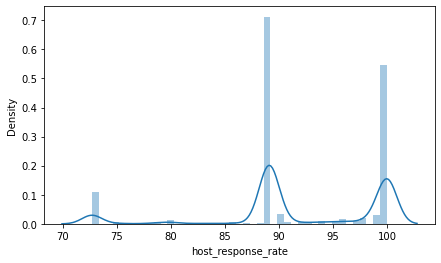

In [69]:
sns.distplot(df_final['host_response_rate'])

<AxesSubplot:xlabel='host_acceptance_rate', ylabel='Density'>

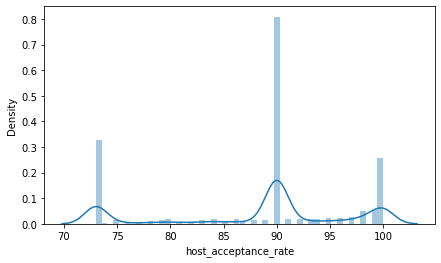

In [70]:
sns.distplot(df_final['host_acceptance_rate'])

In [71]:
# There is a maximum probability that the hosts are accepting the customer request

<AxesSubplot:xlabel='host_total_listings_count', ylabel='Density'>

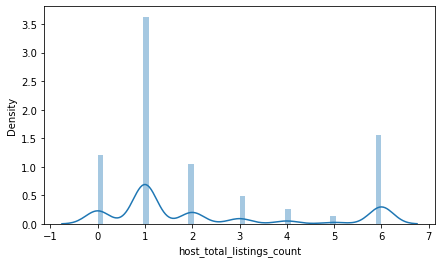

In [72]:
sns.distplot(df_final['host_total_listings_count'])

<AxesSubplot:xlabel='host_total_listings_count', ylabel='count'>

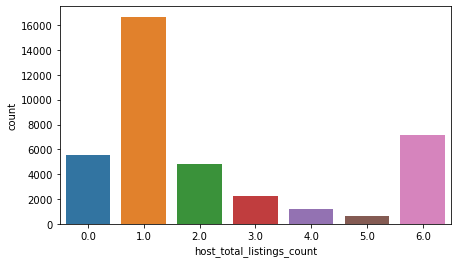

In [73]:
sns.countplot(df_final['host_total_listings_count'])

In [74]:
# most of the hosts have single listings 

<AxesSubplot:xlabel='accommodates', ylabel='count'>

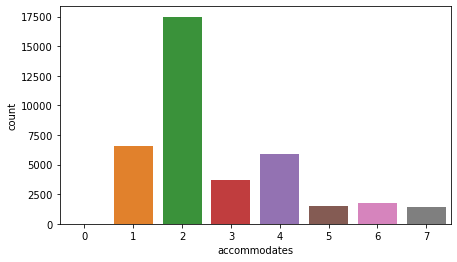

In [75]:
sns.countplot(df_final['accommodates'])

In [76]:
# There are more number of listings with 2 accomodates 

<AxesSubplot:xlabel='beds', ylabel='count'>

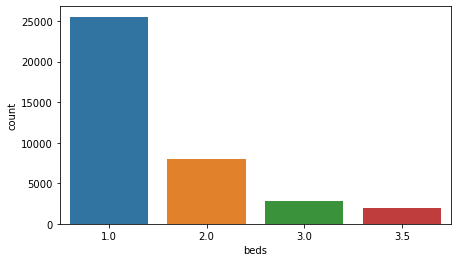

In [77]:
sns.countplot(df_final['beds'])

In [78]:
# Most of the listings have single beds in the room 

In [78]:
# Target Variable (distribution)

<AxesSubplot:xlabel='price', ylabel='Density'>

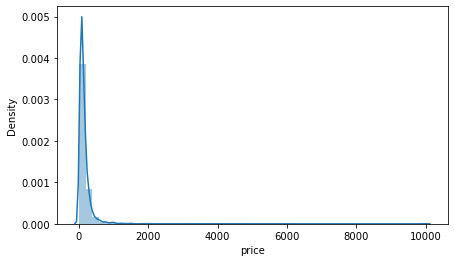

In [79]:
sns.distplot(df_target['price'])

In [80]:
# Since price is right skewed we need to transform 
# our target variable should be always normally distributed 

In [81]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

<AxesSubplot:xlabel='price', ylabel='Density'>

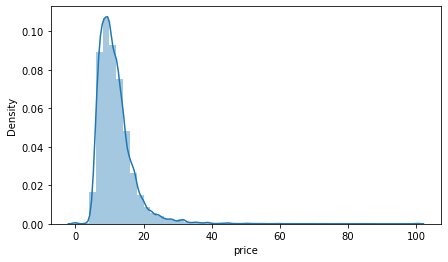

In [82]:
sns.distplot(np.sqrt(df_target['price']))

In [83]:
# Here price looks near normal distribution 

In [84]:
df_new.columns

Index(['host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'accommodates', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'host_is_superhost', 'host_identity_verified',
       'neighbourhood_group_cleans

# Bivariant Analysis

In [87]:
df_final=pd.concat([df_new,df_target],axis=1)
df_final.columns

Index(['host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'accommodates', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'host_is_superhost', 'host_identity_verified',
       'neighbourhood_group_cleans

In [88]:
loc =df_final.groupby(['neighbourhood_group_cleansed']).mean()['price']

<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='price'>

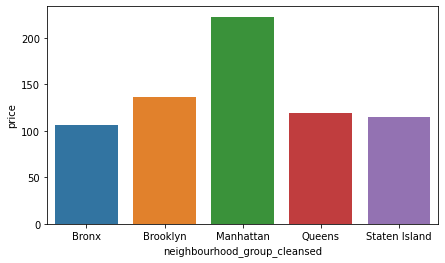

In [89]:
sns.barplot(loc.index , loc)

In [90]:
# The Average price is higher in Manhattan compared to other locatios

In [99]:
pd.crosstab(df_final['instant_bookable'] ,df_final['neighbourhood_group_cleansed'])

neighbourhood_group_cleansed,Bronx,Brooklyn,Manhattan,Queens,Staten Island
instant_bookable,,,,,
f,740,11219,11849,3773,270
t,364,3497,4932,1550,83


In [89]:
# Here we can see most number of bookings are happeing in Manhattan
# Least number of bookings happening in Staten Island

In [100]:
loc2 =df_final.groupby('accommodates').mean()['price']

<AxesSubplot:xlabel='accommodates', ylabel='price'>

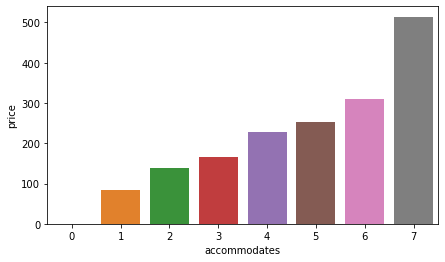

In [101]:
sns.barplot(loc2.index , loc2)

In [92]:
# Increase in accomodates increases price 

<AxesSubplot:xlabel='price', ylabel='number_of_reviews'>

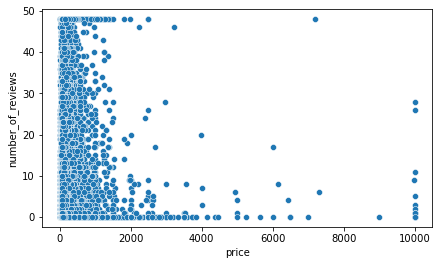

In [102]:
sns.scatterplot(df_final['price'] ,df_final['number_of_reviews'])

In [103]:
# The effect of reviews on price
# increase in price leads to decrease in reviews which means 
# if the price is high maybe you may not get a booking

In [104]:
loc3 =df_final.groupby(['room_type']).mean()['price']

<AxesSubplot:xlabel='room_type', ylabel='price'>

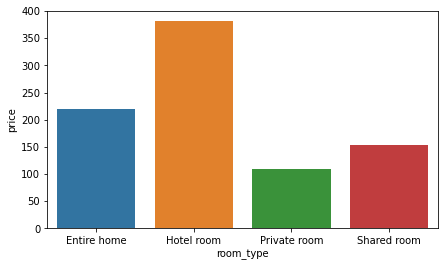

In [105]:
sns.barplot(loc3.index , loc3)

In [106]:
# The Average price of Hotel room is higher compared to others 

<AxesSubplot:xlabel='bathrooms_text', ylabel='price'>

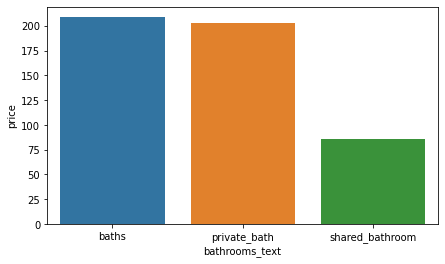

In [107]:
loc5 =df_final.groupby('bathrooms_text').mean()['price']
sns.barplot(loc5.index , loc5)

In [108]:
# The price of shared bathrooms is low (if someone wants a afforadble listings they can choose shared_bathrooms)

# Interpretation

In [100]:
import matplotlib.pyplot as plt

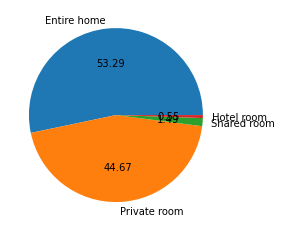

In [109]:
rtype = df_final['room_type'].value_counts()
plt.pie(rtype , labels = rtype.index , autopct = '%.2f' , radius = 1)
plt.show()

In [102]:
# Out of 100% more than 50% listings are Entire home 
# More number of listings are entire home followed by Private room 
# there are only 0.5% listings which are hotel rooms 

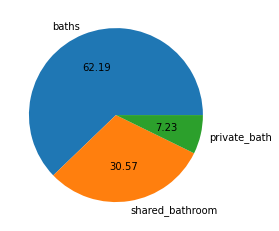

In [110]:
bath =df_final['bathrooms_text'].value_counts()
plt.pie(bath , labels =bath.index , autopct = '%.2f')
plt.show()

In [111]:
# Out of 100% , 62% bathrooms are individual bathrooms 
# Private bathrooms percentage is very low 

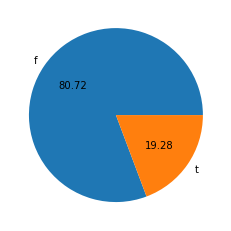

In [112]:
host = df_final['host_is_superhost'].value_counts() 
plt.pie(host ,labels = host.index, autopct = '%.2f')
plt.show()

# Available properties in each location

In [114]:
pd.crosstab(df_final['neighbourhood_group_cleansed'],df_final['room_type'])

room_type,Entire home,Hotel room,Private room,Shared room
neighbourhood_group_cleansed,,,,
Bronx,440,1,634,29
Brooklyn,7529,9,6989,189
Manhattan,10188,191,6158,244
Queens,2056,9,3149,109
Staten Island,184,0,168,1


<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='count'>

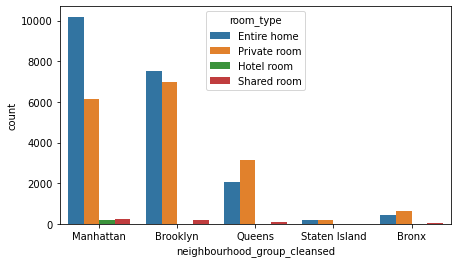

In [115]:
sns.countplot(df_final['neighbourhood_group_cleansed'],hue=df_final['room_type'])

In [116]:
df.groupby(['neighbourhood_group_cleansed','room_type']).mean()['price']

neighbourhood_group_cleansed  room_type      
Bronx                         Entire home/apt   153.452273
                              Hotel room          0.000000
                              Private room       76.047319
                              Shared room        59.034483
Brooklyn                      Entire home/apt   193.321822
                              Hotel room        120.555556
                              Private room       77.872800
                              Shared room        63.084656
Manhattan                     Entire home/apt   252.821457
                              Hotel room        405.308901
                              Private room      169.031504
                              Shared room       175.286885
Queens                        Entire home/apt   179.660506
                              Hotel room        171.111111
                              Private room       72.881867
                              Shared room       291.770642
Staten Isl

# Check for multicollinearity

In [117]:
df33 = df_final[['minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm' ]]

<AxesSubplot:>

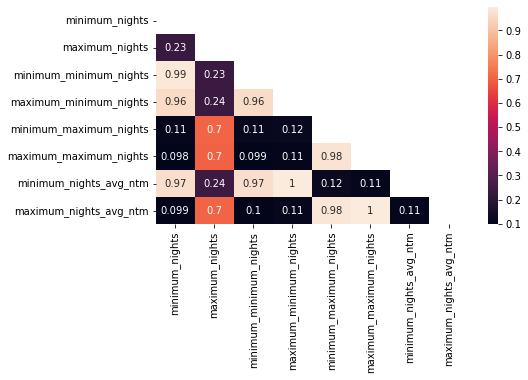

In [118]:
com = df33.corr()
mask = np.triu(com)
sns.heatmap(df33.corr() , annot = True , mask = mask)

In [111]:
# Here there is a  lot of multicollinearity exists between these columns

In [119]:
df44 = df[['availability_30', 'availability_60',
       'availability_90', 'availability_365']]

<AxesSubplot:>

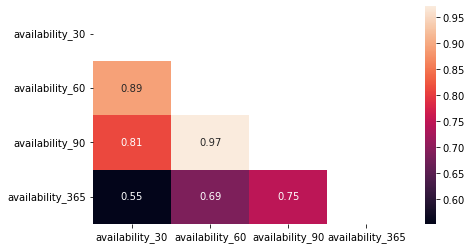

In [120]:
coa = df44.corr()
mask = np.triu(coa )
sns.heatmap(df44.corr() , annot = True , mask = mask)

In [114]:
# Here also lot of multicollinearity exists between columns

In [121]:
df_final.head()

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,room_type,bathrooms_text,instant_bookable,price
0,80.000000,73.000000,6.000000,1,1.000000,1.000000,30,1125,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,3,33,63,338,48,0,4.700000,4.720000,4.620000,4.760000,4.790000,4.860000,4.410000,3,2,0,0,0.330000,f,t,Manhattan,Entire home,baths,f,150.000000
1,72.682840,73.000000,1.000000,3,1.000000,3.000000,1,730,1.000000,1.000000,730.000000,730.000000,1.000000,730.000000,3,6,18,194,48,7,4.450000,4.580000,4.490000,4.780000,4.800000,4.710000,4.640000,1,1,0,0,2.565000,f,t,Brooklyn,Entire home,baths,f,75.000000
2,100.000000,100.000000,1.000000,2,1.000000,1.000000,30,730,30.000000,30.000000,730.000000,730.000000,30.000000,730.000000,27,60,90,365,48,0,4.520000,4.500000,4.180000,4.910000,4.910000,4.470000,4.520000,2,0,2,0,0.520000,f,t,Brooklyn,Private room,baths,f,60.000000
3,100.000000,73.000000,1.000000,4,1.000000,2.000000,5,1125,5.000000,5.000000,1125.000000,1125.000000,5.000000,1125.000000,3,3,12,123,2,1,5.000000,5.000000,5.000000,5.000000,5.000000,4.500000,5.000000,1,1,0,0,0.020000,f,t,Brooklyn,Entire home,baths,f,275.000000
4,100.000000,100.000000,1.000000,2,1.000000,1.000000,2,14,2.000000,2.000000,14.000000,14.000000,2.000000,14.000000,1,16,34,192,48,7,4.250000,4.500000,4.180000,4.700000,4.725000,4.870000,4.360000,1,0,1,0,2.565000,f,f,Manhattan,Private room,baths,f,68.000000


# Statistical tests

In [116]:
# Statistical tests are used to prove the dependency of independent variable on target variable 

In [122]:
df_final['bathrooms_text'].value_counts()

baths              23805
shared_bathroom    11703
private_bath        2769
Name: bathrooms_text, dtype: int64

# One way annova

In [123]:
df_final=pd.concat([df_new,df_target],axis=1)
df_final.columns

Index(['host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'accommodates', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'host_is_superhost', 'host_identity_verified',
       'neighbourhood_group_cleans

In [124]:
bath = df_final[df_final['bathrooms_text'] == 'baths']['price']
sbath = df_final[df_final['bathrooms_text'] == 'shared_bathroom']['price']
pbath = df_final[df_final['bathrooms_text'] == 'private_bath']['price']

In [125]:
import scipy.stats as stats

In [126]:
HN = 'All the sample means are equal'
HA = 'Atleast one sample mean is different'
stat , p_val =stats.f_oneway(bath , sbath ,pbath)
print('P_value' , p_val)
print('p_val is less than significance level so reject null' , HN )
print('Accept alternate' , HA)

P_value 1.218925448838764e-289
p_val is less than significance level so reject null All the sample means are equal
Accept alternate Atleast one sample mean is different


<AxesSubplot:xlabel='price', ylabel='Density'>

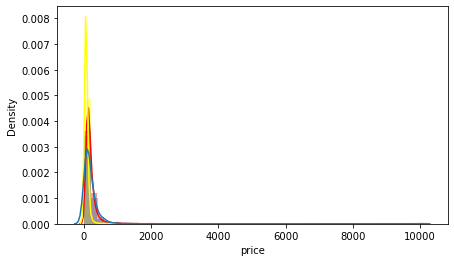

In [127]:
sns.distplot(bath , color = 'red')
sns.distplot(sbath , color = 'yellow')
sns.distplot(pbath)

In [128]:
# Clearly we can see the price is varying based up on bathrooms
# Shared bathrom the price is low

In [129]:
# Price based upon location

In [130]:
df_final['neighbourhood_group_cleansed'].value_counts()

Manhattan        16781
Brooklyn         14716
Queens            5323
Bronx             1104
Staten Island      353
Name: neighbourhood_group_cleansed, dtype: int64

In [131]:
Man = df_final[df_final['neighbourhood_group_cleansed'] == 'Manhattan']['price']
Brooklyn = df_final[df_final['neighbourhood_group_cleansed'] == 'Brooklyn']['price']
Queens = df_final[df_final['neighbourhood_group_cleansed'] == 'Queens']['price']
Bronx = df_final[df_final['neighbourhood_group_cleansed'] == 'Bronx']['price']
Staten = df_final[df_final['neighbourhood_group_cleansed'] == 'Staten Island']['price']

In [132]:
HN = 'All the sample means are equal'
HA = 'Atleast one sample mean is different'
stat , p_val =stats.f_oneway(Man , Brooklyn , Queens , Bronx , Staten)
print('P_value' , p_val)
print('p_val is less than significance level so reject null' , HN )
print('Accept alternate' , HA)

P_value 2.8999651277351186e-192
p_val is less than significance level so reject null All the sample means are equal
Accept alternate Atleast one sample mean is different


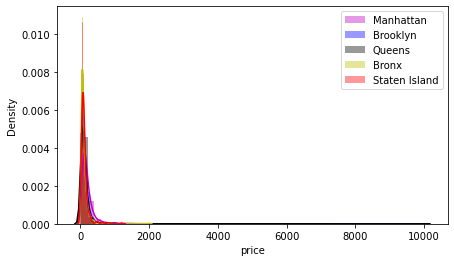

In [133]:
sns.distplot(df_final[df_final['neighbourhood_group_cleansed']=='Manhattan']['price'],color='m' ,label = 'Manhattan' )
sns.distplot(df_final[df_final['neighbourhood_group_cleansed']=='Brooklyn']['price'],color='b' , label = 'Brooklyn')
sns.distplot(df_final[df_final['neighbourhood_group_cleansed']=='Queens']['price'],color='black' , label = 'Queens')
sns.distplot(df_final[df_final['neighbourhood_group_cleansed']=='Bronx']['price'],color='y' , label ='Bronx')
sns.distplot(df_final[df_final['neighbourhood_group_cleansed']=='Staten Island']['price'],color='r' , label = 'Staten Island')
plt.legend()

# 2 Sample t_test

In [134]:
df_dom =df[df['host_is_superhost'] == 'f']['price']
df_dum = df[df['host_is_superhost'] == 't']['price']

<AxesSubplot:xlabel='price', ylabel='Density'>

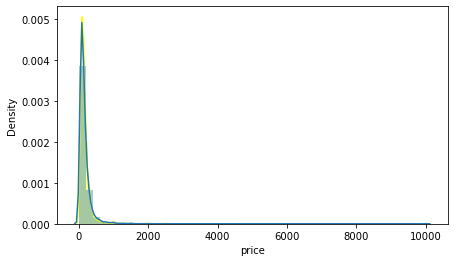

In [135]:
sns.distplot(df_dum , color = 'yellow')
sns.distplot(df_dom)

In [136]:
import scipy.stats as stats
print(stats.levene(df_dom , df_dum))
print('p_val less than 0.5 so reject null ')
print('varibales doesnt have equal variance')

LeveneResult(statistic=10.555526499039635, pvalue=0.0011594118582387688)
p_val less than 0.5 so reject null 
varibales doesnt have equal variance


In [137]:
print(stats.shapiro(df_dom ))
print(stats.shapiro(df_dum))
print('p_value is <0.5 so reject null data is not normal')

ShapiroResult(statistic=0.270064115524292, pvalue=0.0)
ShapiroResult(statistic=0.4581143856048584, pvalue=0.0)
p_value is <0.5 so reject null data is not normal


In [138]:
# It is a non_parametric test
HN = 'mu(t) = Mu(f)'
HA = 'mu(t) != Mu(f)'

In [139]:
print(stats.ttest_ind(df_dom , df_dum))
print('p_value greater than 0.5 so fail to reject null')
print('Means are not varying much')

Ttest_indResult(statistic=1.4083683776346778, pvalue=0.1590301476571377)
p_value greater than 0.5 so fail to reject null
Means are not varying much


In [140]:
df_new.head()

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,room_type,bathrooms_text,instant_bookable
0,80.000000,73.000000,6.000000,1,1.000000,1.000000,30,1125,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,3,33,63,338,48,0,4.700000,4.720000,4.620000,4.760000,4.790000,4.860000,4.410000,3,2,0,0,0.330000,f,t,Manhattan,Entire home,baths,f
1,72.682840,73.000000,1.000000,3,1.000000,3.000000,1,730,1.000000,1.000000,730.000000,730.000000,1.000000,730.000000,3,6,18,194,48,7,4.450000,4.580000,4.490000,4.780000,4.800000,4.710000,4.640000,1,1,0,0,2.565000,f,t,Brooklyn,Entire home,baths,f
2,100.000000,100.000000,1.000000,2,1.000000,1.000000,30,730,30.000000,30.000000,730.000000,730.000000,30.000000,730.000000,27,60,90,365,48,0,4.520000,4.500000,4.180000,4.910000,4.910000,4.470000,4.520000,2,0,2,0,0.520000,f,t,Brooklyn,Private room,baths,f
3,100.000000,73.000000,1.000000,4,1.000000,2.000000,5,1125,5.000000,5.000000,1125.000000,1125.000000,5.000000,1125.000000,3,3,12,123,2,1,5.000000,5.000000,5.000000,5.000000,5.000000,4.500000,5.000000,1,1,0,0,0.020000,f,t,Brooklyn,Entire home,baths,f
4,100.000000,100.000000,1.000000,2,1.000000,1.000000,2,14,2.000000,2.000000,14.000000,14.000000,2.000000,14.000000,1,16,34,192,48,7,4.250000,4.500000,4.180000,4.700000,4.725000,4.870000,4.360000,1,0,1,0,2.565000,f,f,Manhattan,Private room,baths,f


In [141]:
#df_new.drop('host_is_superhost' , axis = 1 , inplace = True)

In [142]:
# Numerical vs Numerical
HN = 'Variables doesnot have corelation'
HA = 'Variables are corelated'

In [143]:
for i in df_new.select_dtypes(include = np.number).columns:
    stat , p_val = stats.pearsonr(df_new[i] , np.sqrt(df_target['price']))
    if p_val > 0.05:
        print('{} Is insignificant p_val is{}'.format(i ,p_val))
    else :
        print('{} Is significant p_val is {}'.format(i , p_val))
    

host_response_rate Is significant p_val is 9.234805030888731e-07
host_acceptance_rate Is significant p_val is 3.958346094806481e-28
host_total_listings_count Is significant p_val is 2.610543335665879e-09
accommodates Is significant p_val is 0.0
bedrooms Is significant p_val is nan
beds Is significant p_val is 0.0
minimum_nights Is significant p_val is 3.600781915740181e-153
maximum_nights Is significant p_val is 0.00779526439523833
minimum_minimum_nights Is significant p_val is 3.418198346067513e-153
maximum_minimum_nights Is significant p_val is 8.113174390459153e-91
minimum_maximum_nights Is significant p_val is 0.007760314617211279
maximum_maximum_nights Is insignificant p_val is0.13095001736371867
minimum_nights_avg_ntm Is significant p_val is 7.547856043099395e-99
maximum_nights_avg_ntm Is insignificant p_val is0.6648858332967185
availability_30 Is significant p_val is 7.200222689679929e-171
availability_60 Is significant p_val is 9.463298413583627e-175
availability_90 Is signific

In [144]:
p_value = []
for i in df_new.select_dtypes(include = np.number).columns:
    stat , p_val = stats.pearsonr(df_new[i] , np.sqrt(df_target['price']))
    p_value.append(p_val)   


In [145]:
df_pval = pd.DataFrame(data = p_value , columns = ['p_values'])
df_pval['features'] = df_new.select_dtypes(include = np.number).columns
df_pval

,p_values,features
0,0.000001,host_response_rate
1,0.000000,host_acceptance_rate
2,0.000000,host_total_listings_count
3,0.000000,accommodates
4,NaN,bedrooms
5,0.000000,beds
6,0.000000,minimum_nights
7,0.007795,maximum_nights
8,0.000000,minimum_minimum_nights
9,0.000000,maximum_minimum_nights


In [146]:
# All the numerical features are co_related with target

# Model Building

In [147]:
df_encoded['constant'] = np.ones(len(df_encoded))

# Base model 

<AxesSubplot:ylabel='Density'>

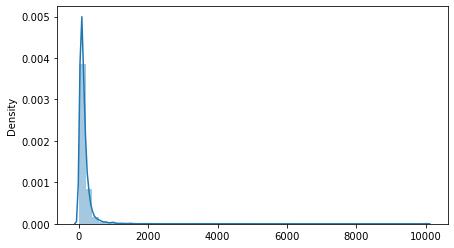

In [148]:
sns.distplot(df_target)

In [149]:
df_target.head()

,price
0,150.000000
1,75.000000
2,60.000000
3,275.000000
4,68.000000


In [150]:
from sklearn.model_selection import train_test_split

In [151]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df_target['price'] = pt.fit_transform(df_target[['price']])

In [152]:
xtrain,xtest,ytrain,ytest = train_test_split(df_encoded , df_target, test_size = 0.3, random_state =2)

In [153]:
base_model = sm.OLS(ytrain , xtrain).fit()

In [154]:
print(base_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     849.9
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:59:54   Log-Likelihood:                -26641.
No. Observations:               26793   AIC:                         5.337e+04
Df Residuals:                   26750   BIC:                         5.372e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [155]:
# Analysing the summary 
base_model.rsquared

0.5716173770046638

In [156]:
# Durbin Watson = 2.004 (equal to 2)
# so no auto correlation
# prob(jarque_bera) < 0.5
# errors are not following normal distribution
# cond_no >1000 
# implies severe multicollinearity
# there are some insignificant columns 

In [157]:
from sklearn.metrics import r2_score
test_pred = base_model.predict(xtest)
pred_score = r2_score(ytest , test_pred)
pred_score

0.5650696707896753

In [158]:
# To improve model we need to remove multicollinearity 

In [159]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(xtrain)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(ytrain, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 6)
    
    # return the training RMSE
    return(rmse_train)

In [160]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(xtest)

    # MSE for the test data
    mse_test = mean_squared_error(ytest, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 6)

    # return the test RMSE
    return(rmse_test)

In [161]:
print('train rmse :' , get_train_rmse(base_model))
print('test rmse :' , get_test_rmse(base_model))
print('Model doesnot have overfitting')

train rmse : 0.654022
test rmse : 0.660636
Model doesnot have overfitting


In [162]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)
train_pred=base_model.predict(xtrain)
test_pred=base_model.predict(xtest)

In [163]:
mape_train = round(mape(ytrain['price'], train_pred),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

Mean Absolute Percentage Error (MAPE) on training set:  198.0052


In [164]:
mape_test = round(mape(ytest['price'], test_pred),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on test set:  197.7984


In [165]:
def train_score(model) :
    train_pred = model.predict(xtrain)
    score = r2_score(ytrain , train_pred)
    return score    

In [166]:
def test_score(model) :
    test_pred = model.predict(xtest)
    score = r2_score(ytest , test_pred)
    return score